# **Laboratorio 2**

- Derek Arreaga - 22537
- Mónica Salvatierra - 22249

Repositorio con el código fuente: https://github.com/alee2602/LAB2-DS

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Descargar dataset de MNIST y generar los conjuntos de entrenamiento y prueba

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


print("Entrenamiento:", x_train.shape, y_train.shape)
print("Prueba:", x_test.shape, y_test.shape)

Entrenamiento: (60000, 28, 28) (60000,)
Prueba: (10000, 28, 28) (10000,)


Normalizar los valores de píxel a rango [0, 1]

In [ ]:

x_train = x_train / 255.0
x_test = x_test / 255.0


Revisar que el rango de los valores de cada pixel estén normaizados

In [4]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


## **Preprocesamiento de datos**

Crear un conjunto de validación a partir del conjunto de entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

# Dividir x_train en 80% entrenamiento y 20% validación
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

print("x_train:", x_train_new.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)


x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
x_test: (10000, 28, 28)


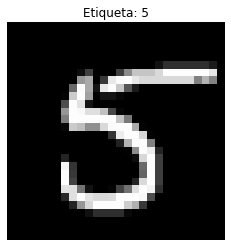

In [22]:
plt.imshow(x_train_new[0], cmap='gray')
plt.title(f"Etiqueta: {y_train_new[0]}")
plt.axis('off')
plt.show()

## **1. Modificación del Ancho de la Red**

Entrenar modelo base de red neuronal (una capa oculta con 128 neuronas)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8078 - loss: 0.6886 - val_accuracy: 0.9359 - val_loss: 0.2311
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9432 - loss: 0.2002 - val_accuracy: 0.9541 - val_loss: 0.1616
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1349 - val_accuracy: 0.9602 - val_loss: 0.1347
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1084 - val_accuracy: 0.9598 - val_loss: 0.1289
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0909 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0740 - val_accuracy: 0.9715 - val_loss: 0.0960
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0610 - val_accuracy: 0.9718 - val_loss: 0.0914
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0507 - val_accuracy: 0.

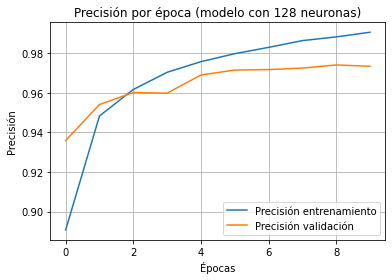

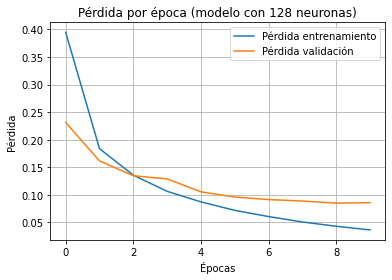

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import time

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
print("Tiempo total de entrenamiento:", round(end - start, 2), "segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
val_acc = history.history['val_accuracy'][-1]
print("Precisión de validación final:", round(val_acc * 100, 2), "%")


Precisión de validación final: 97.34 %


Las gráficas muestran la evolución de la precisión y la pérdida del modelo con una capa oculta de 128 neuronas a lo largo de 10 épocas. En la primera gráfica, se observa que tanto la precisión de entrenamiento como la de validación aumentan rápidamente durante las primeras épocas. La precisión en el conjunto de entrenamiento continúa creciendo hasta superar el 98.5%, mientras que la precisión en el conjunto de validación se estabiliza cerca del 96.5% a partir de la época 5. Esta diferencia entre ambas curvas podría ser un indicio de un posible inicio de sobreajuste, aunque leve, ya que el modelo sigue mejorando su rendimiento sobre los datos de entrenamiento pero no sobre los de validación.

En la segunda gráfica, correspondiente a la pérdida, ambas curvas descienden de manera constante, lo cual indica que el modelo está aprendiendo correctamente. La pérdida en el conjunto de entrenamiento disminuye hasta valores muy bajos, mientras que la pérdida en validación también muestra una tendencia descendente y se estabiliza cerca de 0.08. El hecho de que ambas curvas sigan una trayectoria similar sugiere que el modelo generaliza bien.

Modifique el tamaño de la capa escondida a 200 neuronas

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8295 - loss: 0.6156 - val_accuracy: 0.9440 - val_loss: 0.2016
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1792 - val_accuracy: 0.9582 - val_loss: 0.1462
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1179 - val_accuracy: 0.9652 - val_loss: 0.1161
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0891 - val_accuracy: 0.9705 - val_loss: 0.1046
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0682 - val_accuracy: 0.9720 - val_loss: 0.0919
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0542 - val_accuracy: 0.9729 - val_loss: 0.0893
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0443 - val_accuracy: 0.9753 - val_loss: 0.0820
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0368 - val_accuracy: 0.

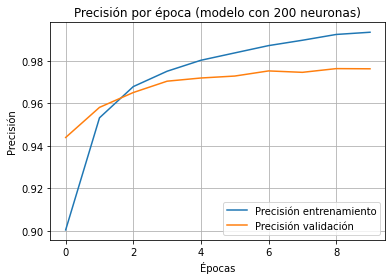

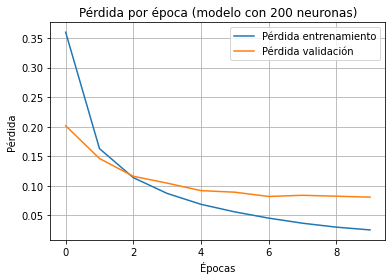

In [20]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),  
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)

# Obtener precisión final en validación
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\n Precisión de validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

Las gráficas presentadas muestran el comportamiento del modelo entrenado con una sola capa oculta de 200 neuronas, durante 10 épocas, utilizando un tamaño de batch de 128. En la primera gráfica, que representa la evolución de la precisión, se observa que tanto la precisión de entrenamiento como la de validación aumentan rápidamente durante las primeras épocas. La precisión en el conjunto de validación se estabiliza cerca del 97.63%, lo cual representa un rendimiento ligeramente superior al modelo base de 128 neuronas, que alcanzó un 97.34%. Esta diferencia, aunque no muy pronunciada, indica que una mayor cantidad de neuronas puede contribuir a una mejora marginal en la capacidad de generalización del modelo.

En la segunda gráfica, correspondiente a la pérdida, ambas curvas descienden de forma constante, reflejando una convergencia adecuada. La pérdida en el conjunto de validación se estabiliza en valores bajos (~0.08), mientras que la del conjunto de entrenamiento continúa disminuyendo hasta alcanzar un valor cercano a 0.03. Esta diferencia sugiere un pequeño grado de sobreajuste, aunque el comportamiento general sigue siendo bastante estable.

Con respecto al tiempo de entrenamiento, el modelo con 200 neuronas tomó 11.44 segundos en completarse, en comparación con los 10.5 segundos que tomó el modelo base. Esta diferencia de 0.94 segundos implica un aumento moderado en el costo computacional. En general, el modelo con 200 neuronas ofrece una mejora ligera en precisión a cambio de una mayor complejidad y tiempo de entrenamiento, lo cual puede ser aceptable dependiendo del contexto o los recursos disponibles.

Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento.

In [ ]:

neuronas_ocultas = [50, 100,300, 500]

resultados = []

for n in neuronas_ocultas:
    print(f"\nEntrenando modelo con {n} neuronas en la capa oculta...")

    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(n, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start_time = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1
    )

    end_time = time.time()
    tiempo = round(end_time - start_time, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    resultados.append((n, val_acc, tiempo))
    print(f"→ Precisión de validación: {val_acc}% | Tiempo: {tiempo} segundos")


Entrenando modelo con 50 neuronas en la capa oculta...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7745 - loss: 0.8205 - val_accuracy: 0.9241 - val_loss: 0.2729
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9272 - loss: 0.2580 - val_accuracy: 0.9375 - val_loss: 0.2187
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2006 - val_accuracy: 0.9473 - val_loss: 0.1842
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1664 - val_accuracy: 0.9528 - val_loss: 0.1646
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9601 - loss: 0.1455 - val_accuracy: 0.9557 - val_loss: 0.1494
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1236 - val_accuracy: 0.9596 - val_loss: 0.1340
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1050 - val_accuracy: 0.9634 - val_loss: 0.1275
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

Se realizaron distintos experimentos modificando el tamaño de la capa oculta con el objetivo de evaluar el impacto en la precisión de validación y el tiempo de entrenamiento. Las configuraciones analizadas incluyeron 50, 100, 128, 200, 300 y 500 neuronas.

El modelo más pequeño, con 50 neuronas, logró una precisión de validación del 96.78% en 9.99 segundos. Al duplicar la cantidad de neuronas a 100, la precisión aumentó a 97.22%, con un tiempo de entrenamiento de 10.49 segundos. El modelo base, con 128 neuronas, tuvo un rendimiento ligeramente superior, alcanzando 97.34% en 10.5 segundos. Posteriormente, al incrementar el ancho a 200 neuronas, la precisión subió a 97.63% y el tiempo a 11.44 segundos, mostrando una mejora consistente aunque marginal.

Las arquitecturas más "robustas", con 300 y 500 neuronas, alcanzaron los mejores desempeños: 97.79% y 97.72% respectivamente. Sin embargo, estos modelos también implicaron tiempos de entrenamiento considerablemente mayores, de 12.93 segundos para 300 neuronas y 20.69 segundos para 500 neuronas. A pesar del buen rendimiento, se observa una ligera tendencia al sobreajuste en los modelos más grandes, ya que la pérdida en validación tiende a estabilizarse o incluso incrementarse levemente hacia las últimas épocas.

En conclusión, la configuración con **300 neuronas** ofreció el mejor balance entre precisión y eficiencia, superando ligeramente a los demás modelos sin requerir un aumento excesivo en el tiempo de entrenamiento. Por otro lado, aunque el modelo con 500 neuronas logró una precisión similar, su costo computacional fue significativamente mayor, por lo que su uso podría no ser justificable en todos los contextos.


## **2. Modificación de la Profundidad de la Red**

Agregue una capa escondida adicional al modelo

In [ ]:


model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='relu'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8172 - loss: 0.6691 - val_accuracy: 0.9465 - val_loss: 0.1896
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9518 - loss: 0.1687 - val_accuracy: 0.9599 - val_loss: 0.1382
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.1109 - val_accuracy: 0.9660 - val_loss: 0.1168
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0837 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0646 - val_accuracy: 0.9715 - val_loss: 0.0941
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9698 - val_loss: 0.0985
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9746 - val_loss: 0.0906
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0337 - val_accuracy: 0.

Para esta siguiente parte, se modificó la arquitectura del modelo original (el cual consistía en una sola capa oculta de 128 neuronas) agregando una segunda capa oculta de 64 neuronas. Esta modificación incrementó la profundidad de la red y, en consecuencia, el número total de parámetros entrenables. Se mantuvo el optimizador adam, la activación ReLU en las capas ocultas, el número de épocas (10) y el batch size (128), con el objetivo de asegurar una comparación justa bajo las mismas condiciones.

En cuanto al rendimiento, el modelo original alcanzó una precisión final de validación del 97.34% y se entrenó en 10.5 segundos. Por su parte, el nuevo modelo de dos capas logró una precisión de validación ligeramente superior, de 97.53%, y tomó 11.54 segundos en completarse. Esta diferencia de 0.19 puntos porcentuales en precisión y aproximadamente 1 segundo adicional de tiempo de entrenamiento sugiere que la segunda capa permitió una mejor capacidad de representación, aunque a un costo computacional moderadamente mayor.

Respecto a la estructura interna del modelo, las dimensiones de los pesos y sesgos reflejan la arquitectura profunda utilizada: la primera capa (Dense(128)) tiene pesos de forma (784, 128) y sesgos de (128,); la segunda capa (Dense(64)) tiene pesos de (128, 64) y sesgos de (64,); y finalmente, la capa de salida (Dense(10)) posee pesos de (64, 10) y sesgos de (10,). Estas dimensiones coinciden con el flujo de datos desde las imágenes de entrada (28x28 = 784) hasta la clasificación en 10 dígitos posibles.

En conclusión, el modelo con dos capas ocultas demostró una mejora en precisión frente al modelo base, con un incremento manejable en el tiempo de entrenamiento. Añadir una capa adicional puede ser beneficioso para mejorar el rendimiento general sin incurrir en sobrecostos significativos.

## **3. Redes Profundas**

Experimente con arquitecturas más profundas, llegando hasta 5 capas escondidas

In [ ]:
arquitecturas = [
    [128, 64],                      # 2 capas
    [256, 128, 64],                 # 3 capas
    [256, 128, 64, 32],             # 4 capas
    [512, 256, 128, 64, 32]         # 5 capas
]

for i, capa_oculta in enumerate(arquitecturas, start=2):
    print("=" * 60)
    print(f" Arquitectura con {i} capas ocultas: {capa_oculta}")


    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for units in capa_oculta:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1  
    )

    end = time.time()
    tiempo = round(end - start, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    print(f" Precisión de validación final: {val_acc}%")
    print(f" Tiempo total de entrenamiento: {tiempo} segundos")

 Arquitectura con 2 capas ocultas: [128, 64]
Epoch 1/10


C:\Users\Ale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7995 - loss: 0.7046 - val_accuracy: 0.9472 - val_loss: 0.1802
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1633 - val_accuracy: 0.9592 - val_loss: 0.1383
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1086 - val_accuracy: 0.9627 - val_loss: 0.1233
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0846 - val_accuracy: 0.9689 - val_loss: 0.1007
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0643 - val_accuracy: 0.9699 - val_loss: 0.0974
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0496 - val_accuracy: 0.9718 - val_loss: 0.0908
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0402 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9757 - val_

Con el objetivo de explorar cómo la profundidad de la red afecta el rendimiento y la eficiencia del modelo, se diseñaron cinco arquitecturas con 2 a 5 capas ocultas. Todas las configuraciones compartieron las mismas condiciones de entrenamiento: 10 épocas, función de activación ReLU, optimizador Adam y tamaño de batch 128.

La arquitectura con 2 capas ocultas (128 y 64 neuronas) alcanzó una precisión de validación del 97.35% en 12.01 segundos. Al aumentar la profundidad a 3 capas (256, 128, 64), se observó una mejora en la precisión, llegando al 97.72%, aunque el tiempo de entrenamiento aumentó a 17.28 segundos. El modelo con 4 capas (256, 128, 64, 32) obtuvo el mayor rendimiento, alcanzando una precisión de 97.99% con un tiempo razonable de 16.36 segundos. Esta arquitectura demostró ser la más equilibrada entre precisión y costo computacional.

Por otro lado, el modelo más profundo, con 5 capas ocultas (512, 256, 128, 64, 32), logró una precisión de validación del 97.56%, menor que la del modelo de 4 capas, y su tiempo de entrenamiento fue el más alto, con 27.25 segundos. Esta caída en la precisión, a pesar de una arquitectura más compleja, sugiere la presencia de problemas de desvanecimiento del gradiente. Este fenómeno ocurre en redes profundas cuando las actualizaciones de los pesos en capas tempranas son mínimas, lo que limita su aprendizaje efectivo. Además, la pérdida de validación se estancó o incluso aumentó ligeramente en las últimas épocas, indicando que el modelo no generaliza mejor pese a su mayor capacidad.

En conjunto, los resultados muestran que aumentar la profundidad inicialmente mejora la precisión, pero más allá de cierto punto, la ganancia se revierte y se acompaña de mayor tiempo de cómputo y riesgo de sobreajuste o desvanecimiento del gradiente. Por lo tanto, el modelo con 4 capas ocultas (256, 128, 64, 32) se identifica como el más efectivo en términos de precisión y eficiencia, superando incluso al modelo más profundo.

## **4. Funciones de Activación I**

Aplique la función de activación sigmoidal a todas las capas.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6429 - loss: 1.4362 - val_accuracy: 0.9085 - val_loss: 0.3709
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9122 - loss: 0.3317 - val_accuracy: 0.9259 - val_loss: 0.2593
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2467 - val_accuracy: 0.9391 - val_loss: 0.2095
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.1930 - val_accuracy: 0.9475 - val_loss: 0.1789
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1609 - val_accuracy: 0.9550 - val_loss: 0.1583
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9618 - loss: 0.1351 - val_accuracy: 0.9592 - val_loss: 0.1375
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1135 - val_accuracy: 0.9620 - val_loss: 0.1254
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0973 - val_accuracy: 0.

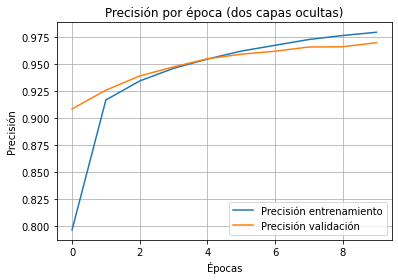

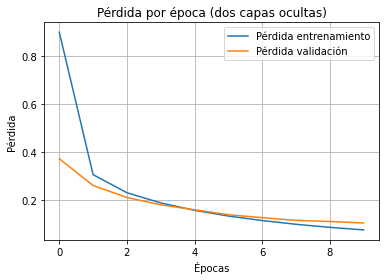

In [40]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),       # Primera capa oculta
    layers.Dense(64, activation='sigmoid'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

Para este experimento se utilizó una arquitectura de red con dos capas ocultas de 128 y 64 neuronas, respectivamente, pero se cambió la función de activación de ambas capas a una sigmoide. El objetivo era evaluar cómo afecta esta activación al rendimiento final del modelo y a su velocidad de convergencia, en comparación con la función ReLU utilizada originalmente.

Durante el entrenamiento, el modelo con activaciones sigmoidales alcanzó una precisión de validación del 96.99% al final de la décima época, lo cual es ligeramente inferior al 97.53% obtenido con ReLU. Si bien la diferencia no es drástica, esto demuestra que ReLU tiene una ligera ventaja en términos de rendimiento final para esta tarea de clasificación con MNIST.

Respecto a la velocidad de convergencia, se observa que la función sigmoide requiere más tiempo de entrenamiento. El tiempo total fue de 12.14 segundos, mientras que el modelo con ReLU tomó 11.54 segundos. Además, la evolución de la pérdida y la precisión a lo largo de las épocas muestra que la red con ReLU converge más rápidamente a una alta precisión, mientras que la red con sigmoide necesita más épocas para estabilizarse y lo hace de forma más gradual.

En términos de arquitectura, ambos modelos utilizaron las mismas dimensiones de pesos y sesgos: la primera capa con pesos de tamaño (784, 128), la segunda con (128, 64), y la capa de salida con (64, 10). Esto confirma que las diferencias observadas se deben al cambio en la función de activación y no en la estructura del modelo.

## **5. Funciones de Activación II**

Aplique ReLU a la primera capa escondida y tanh a la segunda.


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8176 - loss: 0.6671 - val_accuracy: 0.9496 - val_loss: 0.1777
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9544 - loss: 0.1553 - val_accuracy: 0.9590 - val_loss: 0.1421
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1024 - val_accuracy: 0.9697 - val_loss: 0.1008
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0739 - val_accuracy: 0.9678 - val_loss: 0.1029
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0577 - val_accuracy: 0.9739 - val_loss: 0.0852
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0426 - val_accuracy: 0.9737 - val_loss: 0.0891
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0322 - val_accuracy: 0.9742 - val_loss: 0.0885
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0252 - val_accuracy: 0.

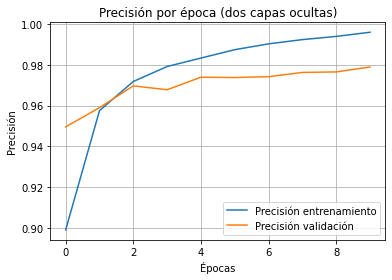

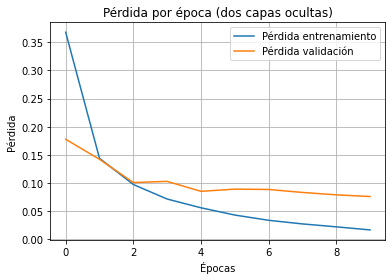

In [42]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='tanh'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

En esta prueba se utilizó una combinación de funciones de activación distintas: ReLU en la primera capa oculta y tanh en la segunda. El objetivo era analizar cómo afecta esta combinación tanto al rendimiento final como a la velocidad de convergencia del modelo, en comparación con las activaciones homogéneas utilizadas previamente (ReLU–ReLU y sigmoid–sigmoid).

El modelo obtuvo una precisión de validación final del 97.89%, la más alta entre los tres modelos evaluados. Esto indica que la combinación ReLU–tanh permitió a la red capturar mejor las características del conjunto de datos MNIST. En cuanto al tiempo de entrenamiento, fue de 11.12 segundos, similar al modelo con activaciones ReLU, pero más rápido que el modelo con sigmoide, que tardó más de 13 segundos. Esto sugiere que la combinación utilizada no solo es precisa, sino también eficiente.

Observando las épocas, se nota que la red comienza con una precisión inicial relativamente alta y converge rápidamente. A partir de la época 6 ya supera el 97.5% de precisión en validación, mostrando una convergencia rápida y estable. En cambio, el modelo con sigmoide mostró una convergencia más lenta y el de ReLU puro, aunque eficiente, no alcanzó esta precisión final.

Las dimensiones de las capas permanecen constantes, con pesos y sesgos organizados de la misma forma: la primera capa (784, 128), la segunda (128, 64) y la salida (64, 10). Esto permite afirmar que las mejoras observadas son atribuibles directamente al cambio en las funciones de activación.

## **6. Tamaño de Batch Grande**


Modifique el tamaño de batch a 10,000.

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.2066 - loss: 2.2090 - val_accuracy: 0.5422 - val_loss: 1.8099
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5968 - loss: 1.6961 - val_accuracy: 0.7301 - val_loss: 1.3144
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7432 - loss: 1.2143 - val_accuracy: 0.7966 - val_loss: 0.9091
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8089 - loss: 0.8417 - val_accuracy: 0.8330 - val_loss: 0.6533
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8439 - loss: 0.6126 - val_accuracy: 0.8591 - val_loss: 0.5162
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8660 - loss: 0.4942 - val_accuracy: 0.8773 - val_loss: 0.4397
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8781 - loss: 0.4348 - val_accuracy: 0.8873 - val_loss: 0.3927
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8877 - loss: 0.3866 - val_accuracy: 0.8964 - val_loss: 0.3598

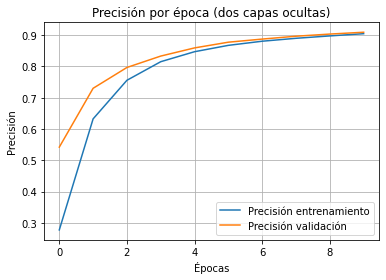

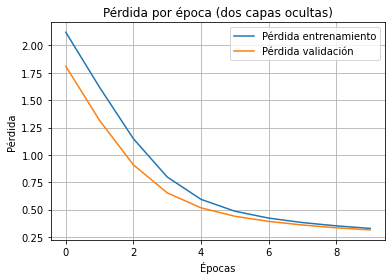

In [37]:

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='relu'),        # Segunda capa oculta  
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 10000
)

end = time.time()
tiempo = round(end - start, 2)

# Obtener precisión final en validación
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\n Precisión de validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

En esta prueba, se modificó el tamaño del batch de entrenamiento a 10,000 utilizando la misma arquitectura de dos capas ocultas del inciso 2. El objetivo era analizar el impacto de esta modificación en el tiempo de entrenamiento y la precisión del modelo, así como comprender los motivos teóricos detrás de los cambios observados.

En términos de precisión, el modelo con batch grande alcanzó una precisión de validación final de 90.91%, mientras que en el inciso 2, con batch de 128, la precisión final fue de 97.53%. Esta disminución en el rendimiento puede atribuirse al hecho de que con un batch tan grande se hacen menos actualizaciones de los pesos por época, lo que reduce la frecuencia de ajuste fino y puede limitar la capacidad del modelo para generalizar. Además, el aprendizaje se vuelve más estable pero menos sensible a variaciones útiles en los datos.

Por otro lado, el tiempo total de entrenamiento con batch grande fue significativamente menor: 4.23 segundos comparado con 13.59 segundos del entrenamiento estándar. Esto se debe a que, al procesar más datos por batch, se realizan menos iteraciones por época, lo que reduce el tiempo de cómputo total.

Teóricamente, el uso de un batch grande implica que los gradientes calculados en cada paso de entrenamiento son más estables y precisos, ya que se basan en una muestra muy representativa de los datos. Sin embargo, esto también reduce la "diversidad" de caminos de optimización explorados, lo cual puede ralentizar la convergencia hacia mínimos más generales. En cambio, con batches pequeños, aunque los gradientes sean más ruidosos, permiten que el modelo explore una mayor variedad de regiones del espacio de parámetros, ayudando potencialmente a evitar mínimos locales y mejorar la generalización.

Utilizar un batch grande reduce el tiempo de entrenamiento pero puede afectar negativamente la precisión del modelo, especialmente en tareas donde el ajuste fino de los pesos es crucial.